XOR Problem: Traditional vs. Neural Network Solutions

# Introduction
This notebook demonstrates solving the XOR problem using two approaches:
1. A traditional algorithmic approach
2. A neural network implementation

We aim to highlight the differences in methodology and the opportunities neural networks provide.

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a graphic to illustrate the XOR gate
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([0, 1, 1, 0])

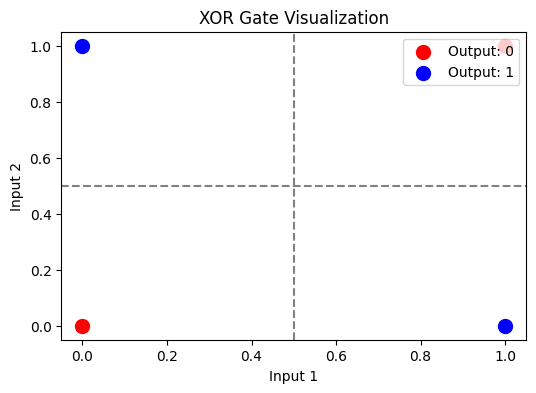

In [3]:
# Visualize XOR gate logic
plt.figure(figsize=(6, 4))
for i, input_pair in enumerate(xor_inputs):
    plt.scatter(input_pair[0], input_pair[1], c='red' if xor_outputs[i] == 0 else 'blue', s=100, label=f"Output: {xor_outputs[i]}" if i < 2 else "")
plt.axhline(0.5, color='gray', linestyle='--')
plt.axvline(0.5, color='gray', linestyle='--')
plt.title("XOR Gate Visualization")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.show()

In [4]:
## Traditional Algorithmic Example
# Define a traditional algorithm for solving XOR
print("Algorithmic Solution for XOR")
def xor_algorithm(x, y):
    return x ^ y  # XOR operation

Algorithmic Solution for XOR


In [5]:
for pair in xor_inputs:
    print(f"Inputs: {pair[0]}, {pair[1]} -> Output: {xor_algorithm(pair[0], pair[1])}")

Inputs: 0, 0 -> Output: 0
Inputs: 0, 1 -> Output: 1
Inputs: 1, 0 -> Output: 1
Inputs: 1, 1 -> Output: 0


In [6]:
## Machine Learning Approach: Neural Network
print("\nNeural Network Implementation")


Neural Network Implementation


In [7]:
# Define the Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.random.randn(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.random.randn(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, input_data, target):
        # Forward pass
        input_data = np.array(input_data)
        target = np.array(target)
        hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = self.sigmoid(final_input)

        # Error calculation
        error = target - final_output

        # Backward pass
        output_gradient = error * self.sigmoid_derivative(final_output)
        hidden_error = np.dot(output_gradient, self.weights_hidden_output.T)
        hidden_gradient = hidden_error * self.sigmoid_derivative(hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.learning_rate * np.dot(hidden_output.reshape(-1, 1), output_gradient.reshape(1, -1))
        self.bias_output += self.learning_rate * output_gradient
        self.weights_input_hidden += self.learning_rate * np.dot(input_data.reshape(-1, 1), hidden_gradient.reshape(1, -1))
        self.bias_hidden += self.learning_rate * hidden_gradient

    def predict(self, input_data):
        # Forward pass
        input_data = np.array(input_data)
        hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = self.sigmoid(final_input)
        return final_output

In [8]:
# XOR Training Data
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [0, 1, 1, 0]

In [9]:
# Initialize and Train the Neural Network
model = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)
for epoch in range(10000):
    for x, y in zip(inputs, outputs):
        model.train(x, y)

In [10]:
# Predictions
predictions = [model.predict(x) for x in inputs]
print("\nNeural Network Predictions:")
for i, pred in enumerate(predictions):
    print(f"Inputs: {inputs[i]} -> Prediction: {pred[0]:.4f} -> Rounded: {round(pred[0])}")


Neural Network Predictions:
Inputs: [0, 0] -> Prediction: 0.0685 -> Rounded: 0
Inputs: [0, 1] -> Prediction: 0.9259 -> Rounded: 1
Inputs: [1, 0] -> Prediction: 0.9227 -> Rounded: 1
Inputs: [1, 1] -> Prediction: 0.0608 -> Rounded: 0


In [11]:
## Visualizing the Neural Network
from matplotlib.patches import FancyArrow
import networkx as nx

In [12]:
# Build the Neural Network Graph
def visualize_nn(weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    G = nx.DiGraph()

    # Add Nodes
    G.add_nodes_from(["Input 1", "Input 2"], layer=0)
    G.add_nodes_from(["Hidden 1", "Hidden 2"], layer=1)
    G.add_nodes_from(["Output"], layer=2)

    # Add Edges with Weights
    for i, inp in enumerate(["Input 1", "Input 2"]):
        for h, hid in enumerate(["Hidden 1", "Hidden 2"]):
            G.add_edge(inp, hid, weight=weights_input_hidden[i, h])
    for h, hid in enumerate(["Hidden 1", "Hidden 2"]):
        G.add_edge(hid, "Output", weight=weights_hidden_output[h, 0])

    pos = nx.multipartite_layout(G, subset_key="layer")
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", edge_color="gray")
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Visualized Neural Network for XOR")
    plt.show()

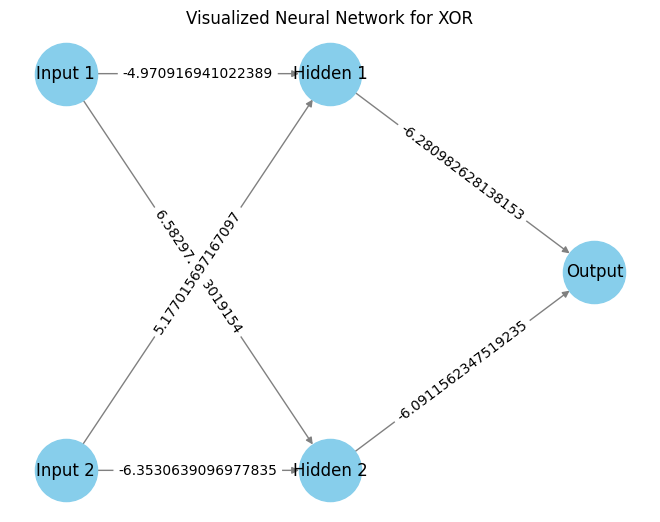

In [13]:
visualize_nn(model.weights_input_hidden, model.weights_hidden_output, model.bias_hidden, model.bias_output)

This is the visualization of the neural network plottet manually and marked

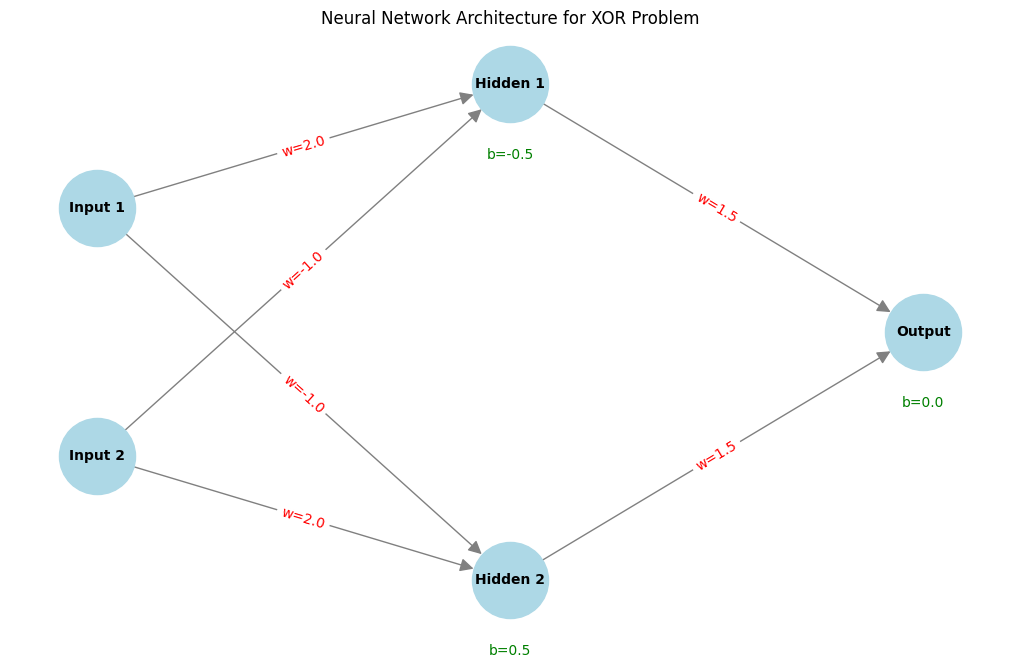

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the XOR neural network structure
G = nx.DiGraph()

# Input layer nodes
G.add_node("Input 1", pos=(0, 2), layer='Input')
G.add_node("Input 2", pos=(0, 1), layer='Input')

# Hidden layer nodes
G.add_node("Hidden 1", pos=(1, 2.5), layer='Hidden')
G.add_node("Hidden 2", pos=(1, 0.5), layer='Hidden')

# Output layer nodes
G.add_node("Output", pos=(2, 1.5), layer='Output')

# Edges (connections)
edges = [
    ("Input 1", "Hidden 1"), ("Input 1", "Hidden 2"),
    ("Input 2", "Hidden 1"), ("Input 2", "Hidden 2"),
    ("Hidden 1", "Output"), ("Hidden 2", "Output")
]

G.add_edges_from(edges)

# Extract positions for plotting
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(
    G, pos, with_labels=True, node_size=3000, 
    node_color='lightblue', font_size=10, font_weight='bold',
    arrowsize=20, edge_color='gray'
)

# Annotate weights and biases (example values after training)
weights_and_biases = {
    ("Input 1", "Hidden 1"): 2.0, ("Input 1", "Hidden 2"): -1.0,
    ("Input 2", "Hidden 1"): -1.0, ("Input 2", "Hidden 2"): 2.0,
    ("Hidden 1", "Output"): 1.5, ("Hidden 2", "Output"): 1.5
}
biases = {
    "Hidden 1": -0.5,
    "Hidden 2": 0.5,
    "Output": 0.0
}

# Draw edge labels
edge_labels = {(u, v): f'w={w}' for (u, v), w in weights_and_biases.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Draw node annotations for biases
for node, (x, y) in pos.items():
    if node in biases:
        plt.text(x, y-0.3, f'b={biases[node]}', fontsize=10, color='green', ha='center')

plt.title("Neural Network Architecture for XOR Problem")
plt.axis('off')
plt.show()


# Summary
- The traditional algorithm uses explicit rules, limited to specific problems.
- Neural networks learn patterns and generalize, opening opportunities for diverse and complex tasks.